#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Задачи для совместного разбора

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

In [ ]:
import torch

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights =
    self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights + self.bias

  def backward(self, inputs, dldy):
    self.dw = dldy * inputs
    self.db = dldy

In [ ]:
class Loss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    #dL/dy~
    self.dypred =  2*(y_pred - y_true)

In [ ]:
x = torch.tensor([2.0, 3.0])
y = torch.tensor([5.0])
neuron = Neuron(
    weights=torch.tensor([3.5, 4.5]),
    bias=0.5
)

In [ ]:
critertion = Loss()
y_pred = neuron.forward(x)
loss = critertion.forward(y_pred, y)

critertion.backward(y_pred, y)
neuron.backward(x, critertion.dypred)

In [ ]:
neuron.dw

tensor([64., 96.])

In [ ]:
neuron.db

tensor([32.])

2\. Настройте модель нейрона, используя метод стохастического градиентного спуска

In [ ]:
learning_rate = 0.01
w = torch.Tensor([3.5, 4.5])
b = 0.5
neuron = Neuron(
    weights=w,
    bias=b
)

for _ in range(70):
  y_pred = neuron.forward(x)
  loss = critertion.forward(y_pred, y)
  critertion.backward(y_pred, y)
  neuron.backward(x, critertion.dypred)
  w -= learning_rate * neuron.dw
  b -= learning_rate * neuron.db
  neuron.weights = w
  neuron.bias = b

In [ ]:
neuron.weights, neuron.bias

(tensor([1.2143, 1.0714]), tensor([-0.6429]))

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features, rg: bool = False):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.weights = torch.normal(0, 1, size=(n_features, n_neurons), requires_grad=rg)

    def forward(self, inputs):
        res = inputs @ self.weights
        return res

    def backward(self, inputs, dldy):
      self.dw = inputs.T @ dldy

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

  def backward(self, y_pred, y_true):
    self.dypred =  2 / len(y_true) *(y_pred - y_true)

In [ ]:
inputs = torch.tensor([[1, 1, 2, 3, 2.5],
                       [1, 2, 5, -1, 2],
                       [1, -1.5, 2.7, 3.3, -0.8]])
inputs.shape

torch.Size([3, 5])

In [ ]:
inputs = torch.tensor([[1, 1, 2, 3, 2.5],
                       [1, 2, 5, -1, 2],
                       [1, -1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0]).reshape(-1,1)
m = inputs.shape[1]
lin = Linear(1, m, rg=True)

In [ ]:
critertion = MSELoss()
y_pred = lin.forward(inputs)
loss = critertion.forward(y_pred, y)

critertion.backward(y_pred, y)
lin.backward(inputs, critertion.dypred)

In [ ]:
dw1 = lin.dw; dw1

tensor([[ 5.8262],
        [11.5736],
        [23.4437],
        [ 0.9370],
        [14.7164]], grad_fn=<MmBackward0>)

In [ ]:
loss.backward()

In [ ]:
dw2 = lin.weights.grad; dw2

tensor([[ 5.8262],
        [11.5736],
        [23.4437],
        [ 0.9370],
        [14.7164]])

In [ ]:
torch.equal(dw1, dw2)

True

<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
learning_rate = 0.01
lin = Linear(
    n_features=4,
    n_neurons=1
)
part = 50
critertion = MSELoss()
for _ in range(1000):
  y_pred = lin.forward(X[:part])
  loss = critertion.forward(y_pred, y[:part])
  critertion.backward(y_pred, y[:part])
  lin.backward(X[:part], critertion.dypred)
  lin.weights -= learning_rate * lin.dw

In [ ]:
lin.weights

tensor([[ 5.5975],
        [86.4272],
        [27.2658],
        [41.4502]])

<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.weights = torch.normal(0, 1, size=(n_features, n_neurons))

    def forward(self, inputs):
        res = inputs @ self.weights
        return res

    def backward(self, inputs, dldy):
      self.dw = inputs.T @ dldy
      self.dx = dldy @ self.weights.T

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    self.loss = ((y_pred - y_true) ** 2).mean()
    return self.loss

  def backward(self, y_pred, y_true):
    self.dypred =  2 / len(y_true) *(y_pred - y_true)

In [ ]:
inputs = torch.tensor([[1, 1, 2, 3, 2.5],
                       [1, 2, 5, -1, 2],
                       [1, -1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0]).reshape(-1,1)
m = inputs.shape[1]
lin3 = Linear(3, m)

In [ ]:
critertion = MSELoss()
y_pred = lin3.forward(inputs)
loss = critertion.forward(y_pred, y)

critertion.backward(y_pred, y)
lin3.backward(inputs, critertion.dypred)

In [ ]:
dw1 = lin3.dw; dw1

tensor([[ -6.0554,  -6.2947,  -6.0297],
        [ 17.0165, -12.0337, -16.1353],
        [ -6.1720, -27.5623, -25.3173],
        [-35.6016,   1.4173,   2.1535],
        [  8.4366, -14.1124, -19.4872]])

In [ ]:
w = th.empty_like(lin3.weights).copy_(lin3.weights).requires_grad_(True)
y_test = inputs @ w
L = 1 / len(y_test) * ((y_test - y)**2).sum()
L.backward()
dw2 = w.grad
dw2

tensor([[ -6.0554,  -6.2947,  -6.0297],
        [ 17.0165, -12.0337, -16.1353],
        [ -6.1720, -27.5623, -25.3173],
        [-35.6016,   1.4173,   2.1535],
        [  8.4366, -14.1124, -19.4872]])

In [ ]:
th.equal(dw1, dw2)

True

<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
learning_rate = 0.01
lin = Linear(
    n_features=4,
    n_neurons=3
)
critertion = MSELoss()
for _ in range(1000):
  y_pred = lin.forward(X)
  loss = critertion.forward(y_pred, y)
  critertion.backward(y_pred, y)
  lin.backward(X, critertion.dypred)
  lin.weights -= learning_rate * lin.dw

In [ ]:
lin.weights

tensor([[ 5.6493,  5.6493,  5.6493],
        [86.4931, 86.4931, 86.4931],
        [27.3569, 27.3569, 27.3569],
        [41.4758, 41.4758, 41.4758]])

<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [ ]:
import torch as th

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())

In [ ]:
X_ = th.cat((X, th.ones_like(X)), 1)

In [ ]:
learning_rate = 0.0001
critertion = MSELoss()
results = []
lin1 = Linear(10, X_.shape[1])
lin2 = Linear(1, 10)

for i in range(1000):
  t1 = lin1.forward(X_)
  t2 = lin2.forward(t1)
  loss = critertion.forward(t2, y)
  critertion.backward(t2, y)
  lin2.backward(t1, critertion.dypred)
  dt1 = lin2.dx
  lin1.backward(X_, dt1)
  lin1.weights -= learning_rate * lin1.dw
  lin2.weights -= learning_rate * lin2.dw
  if i % 250 == 0:
    print(loss)
    results.append(t2)

tensor(7.7604)
tensor(1.1875)
tensor(0.3695)
tensor(0.2124)


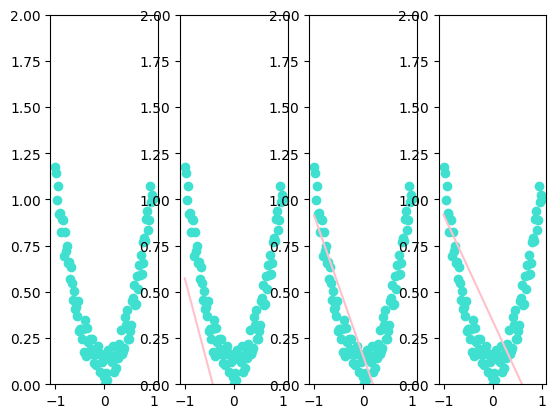

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=4)
for i in range(len(results)):
  axs[i].scatter(X, y, color='turquoise')
  axs[i].plot(X, results[i], color='pink')
  axs[i].set_ylim([0, 2])

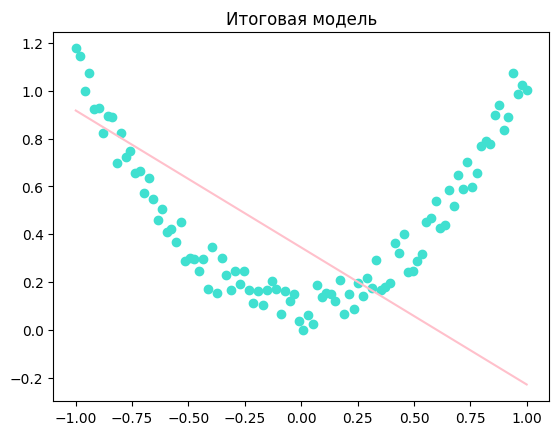

In [ ]:
plt.scatter(X, y, color='turquoise')
plt.plot(X, results[3], color='pink')
plt.title('Итоговая модель');

<p class="task" id="6"></p>

6\. Cоздайте нейросеть и решите задачу регрессии из предыдущей задачи.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [ ]:
class ReLU:
  def forward(self, inputs):
    return th.clip(inputs, min=0)
  def backward(self, inputs):
    return th.where(inputs >= 0, 1, 0)

In [ ]:
import torch as th

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())

In [ ]:
X_ = th.cat((X, th.ones_like(X)), 1)

In [ ]:
learning_rate = 0.01
critertion = MSELoss()
results = []
lin1 = Linear(10, X_.shape[1])
relu = ReLU()
lin2 = Linear(1, 10)

for i in range(3000):
  t1 = lin1.forward(X_)
  h1 = relu.forward(t1)
  t2 = lin2.forward(h1)
  loss = critertion.forward(t2, y)
  critertion.backward(t2, y)
  lin2.backward(h1, critertion.dypred)
  dh1 = lin2.dx
  dt1 = dh1 * relu.backward(t1)
  lin1.backward(X_, dt1)
  lin1.weights -= learning_rate * lin1.dw
  lin2.weights -= learning_rate * lin2.dw
  if i % 750 == 0:
    print(loss)
    results.append(t2)

tensor(5.8482)
tensor(0.0133)
tensor(0.0091)
tensor(0.0081)


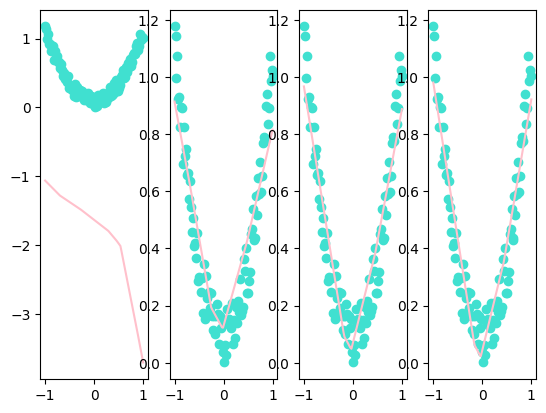

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=4)
for i in range(len(results)):
  axs[i].scatter(X, y, color='turquoise')
  axs[i].plot(X, results[i], color='pink')

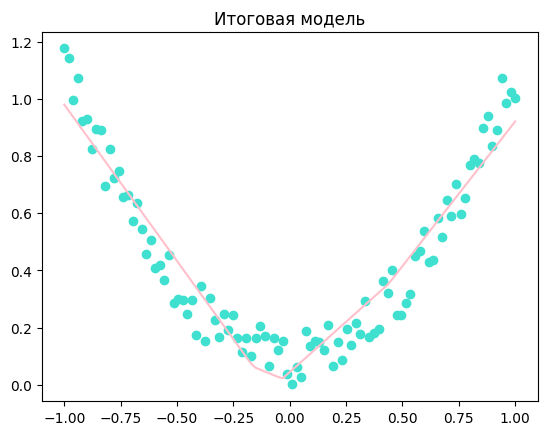

In [ ]:
plt.scatter(X, y, color='turquoise')
plt.plot(X, results[3], color='pink')
plt.title('Итоговая модель');

## Обратная связь
- [x] Хочу получить обратную связь по решению